<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #180161; font-size:100%; text-align:left; color:white">

<h3 align="center"><font color='#DAA520'>💡 About the Dataset</font></h3>
    
This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable **GradeClass**, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

##### Table of Contents
1. Student Information
2. Demographic Details
3. Study Habits
4. Parental Involvement
5. Extracurricular Activities
6. Academic Performance
7. Target Variable: Grade Class

##### Student Information
- **StudentID**: A unique identifier assigned to each student (1001 to 3392).

##### Demographic Details
- **Age**: The age of the students ranges from 15 to 18 years.
- **Gender**: Gender of the students, where 0 represents Male and 1 represents Female.
- **Ethnicity**: The ethnicity of the students, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- **ParentalEducation**: The education level of the parents, coded as follows:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelor's
  - 4: Higher

##### Study Habits
- **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.
- **Absences**: Number of absences during the school year, ranging from 0 to 30.
- **Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.

##### Parental Involvement
- **ParentalSupport**: The level of parental support, coded as follows:
  - 0: None
  - 1: Low
  - 2: Moderate
  - 3: High
  - 4: Very High

##### Extracurricular Activities
- **Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- **Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.
- **Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.
- **Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

##### Academic Performance
- **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

##### Target Variable: Grade Class
- **GradeClass**: Classification of students' grades based on GPA:
  - 0: 'A' (GPA >= 3.5)
  - 1: 'B' (3.0 <= GPA < 3.5)
  - 2: 'C' (2.5 <= GPA < 3.0)
  - 3: 'D' (2.0 <= GPA < 2.5)
  - 4: 'F' (GPA < 2.0)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Import Necessary Libraries</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Load the Data</h2>
</div>

In [2]:
df = pd.read_csv("data/Student_performance_data _.csv")

In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Sanity Check of Data</h2>
</div>

In [4]:
df.shape

(2392, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
for i in df.columns:
	print(df[i].value_counts())
	print("***" * 10)

StudentID
1001    1
2590    1
2592    1
2593    1
2594    1
       ..
1798    1
1799    1
1800    1
1801    1
3392    1
Name: count, Length: 2392, dtype: int64
******************************
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64
******************************
Gender
1    1222
0    1170
Name: count, dtype: int64
******************************
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64
******************************
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
******************************
StudyTimeWeekly
19.833723    1
16.082185    1
2.543624     1
7.971184     1
3.403053     1
            ..
18.116988    1
10.324956    1
3.074986     1
18.434533    1
17.819907    1
Name: count, Length: 2392, dtype: int64
******************************
Absences
25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
1

In [9]:
df.drop(["StudentID"], axis=1, inplace=True)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Exploratory Data Anlaysis (EDA)</h2>
</div>

In [10]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Age,2392.000000,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.000000,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.000000,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.000000,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.000000,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.000000,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.000000,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.000000,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.000000,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.000000,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


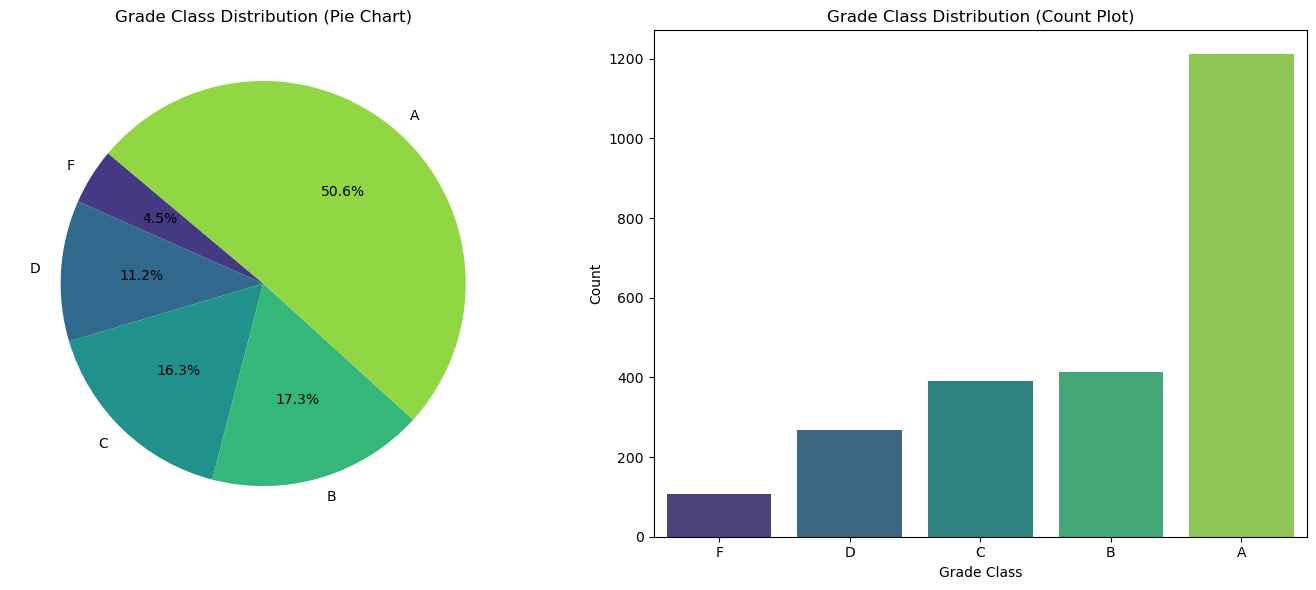

In [12]:
grade_counts = df['GradeClass'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(grade_counts))
labels=['F', 'D', 'C', 'B', 'A']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Grade Class Distribution (Pie Chart)')
sns.countplot(x='GradeClass', data=df, ax=ax2, palette=palette)
ax2.set_title('Grade Class Distribution (Count Plot)')
ax2.set_xlabel('Grade Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(labels)
plt.tight_layout()
plt.show()

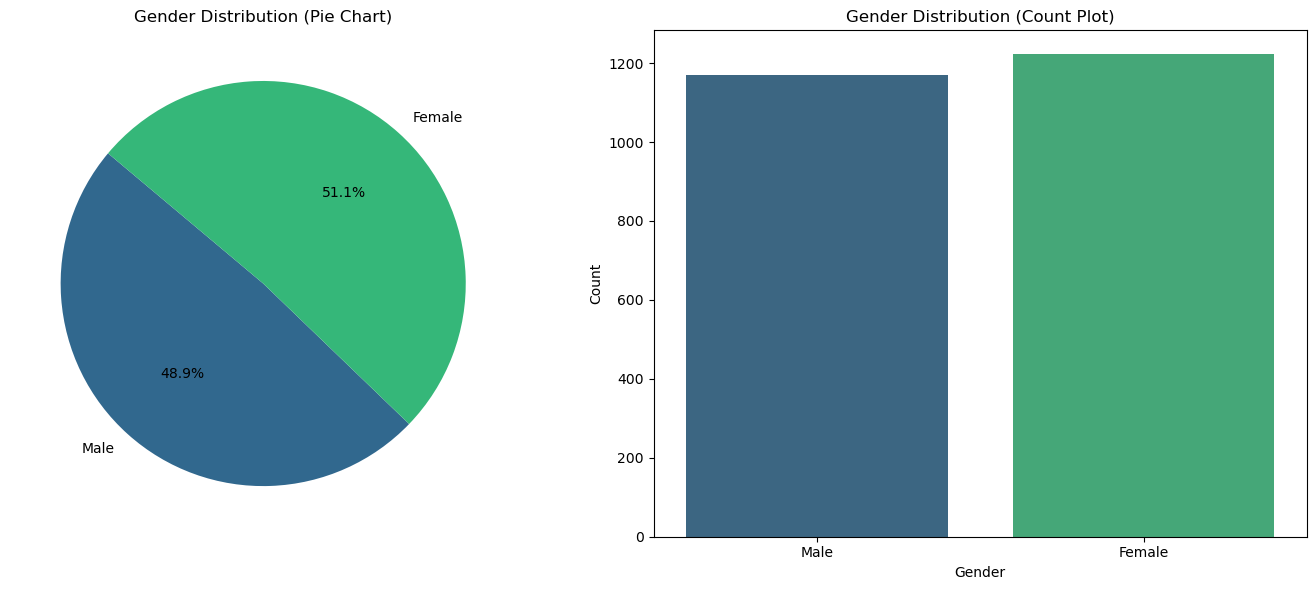

In [13]:
gender = df['Gender'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(gender))
labels = ['Male', 'Female']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(gender, labels=labels, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Gender Distribution (Pie Chart)')
sns.countplot(x='Gender', data=df, ax=ax2, palette=palette)
ax2.set_title('Gender Distribution (Count Plot)')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
ax2.set_xticklabels(labels)
plt.tight_layout()
plt.show()

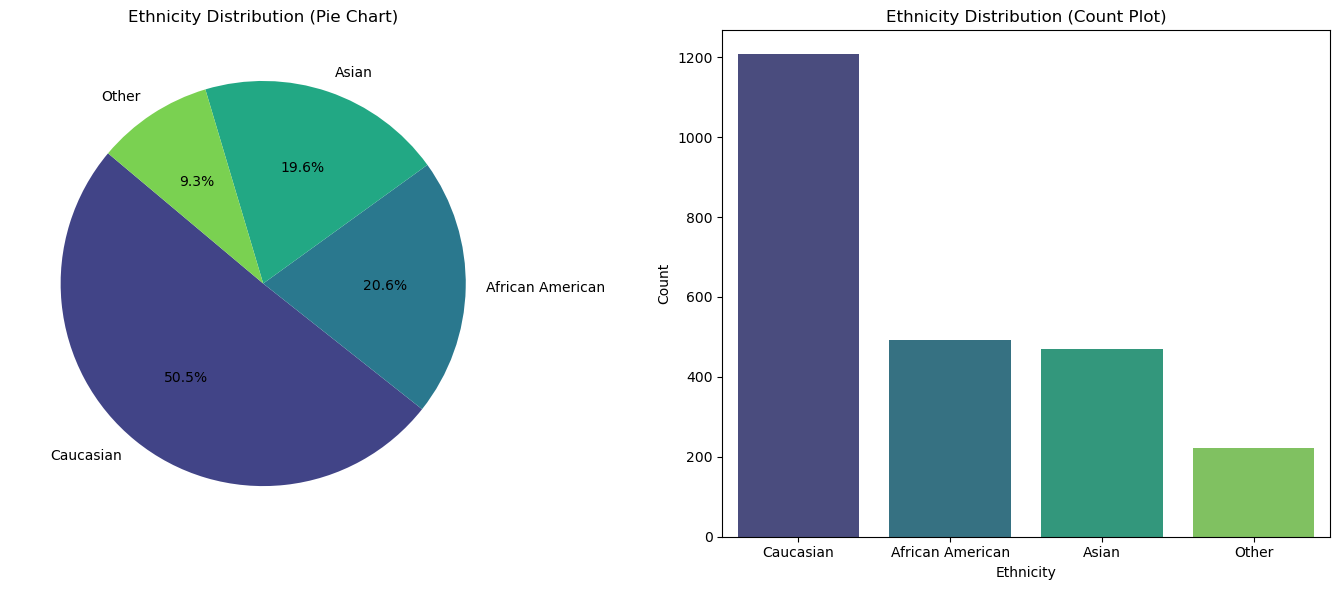

In [14]:
ethnicity = df['Ethnicity'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(ethnicity))
labels = ['Caucasian', 'African American', 'Asian', 'Other']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(ethnicity, autopct='%1.1f%%', startangle=140, labels=labels, colors=palette)
ax1.set_title('Ethnicity Distribution (Pie Chart)')
sns.countplot(x='Ethnicity', data=df, ax=ax2, palette=palette)
ax2.set_title('Ethnicity Distribution (Count Plot)')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Count')
ax2.set_xticklabels(labels)
plt.tight_layout()
plt.show()

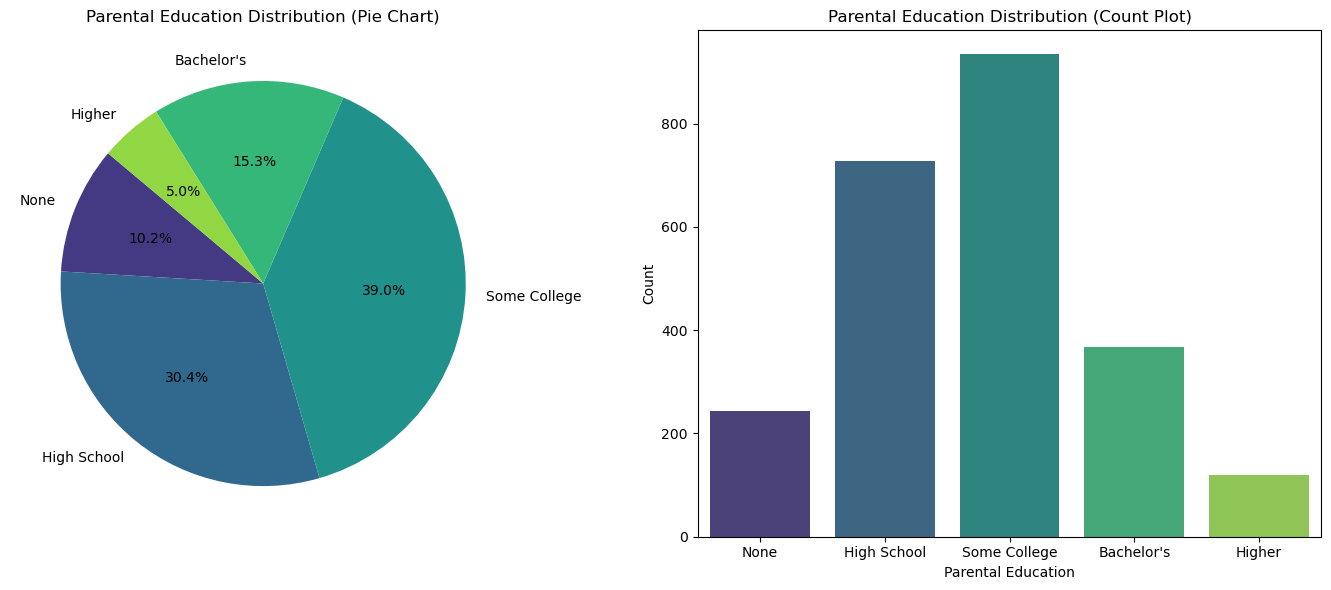

In [17]:
parental_education = df['ParentalEducation'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(parental_education))
labels = ['None', 'High School', 'Some College', "Bachelor's", 'Higher']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(parental_education, autopct='%1.1f%%', startangle=140, labels=labels, colors=palette)
ax1.set_title('Parental Education Distribution (Pie Chart)')
sns.countplot(x='ParentalEducation', data=df, ax=ax2, palette=palette)
ax2.set_title('Parental Education Distribution (Count Plot)')
ax2.set_xlabel('Parental Education')
ax2.set_ylabel('Count')
ax2.set_xticklabels(labels)
plt.tight_layout()
plt.show()

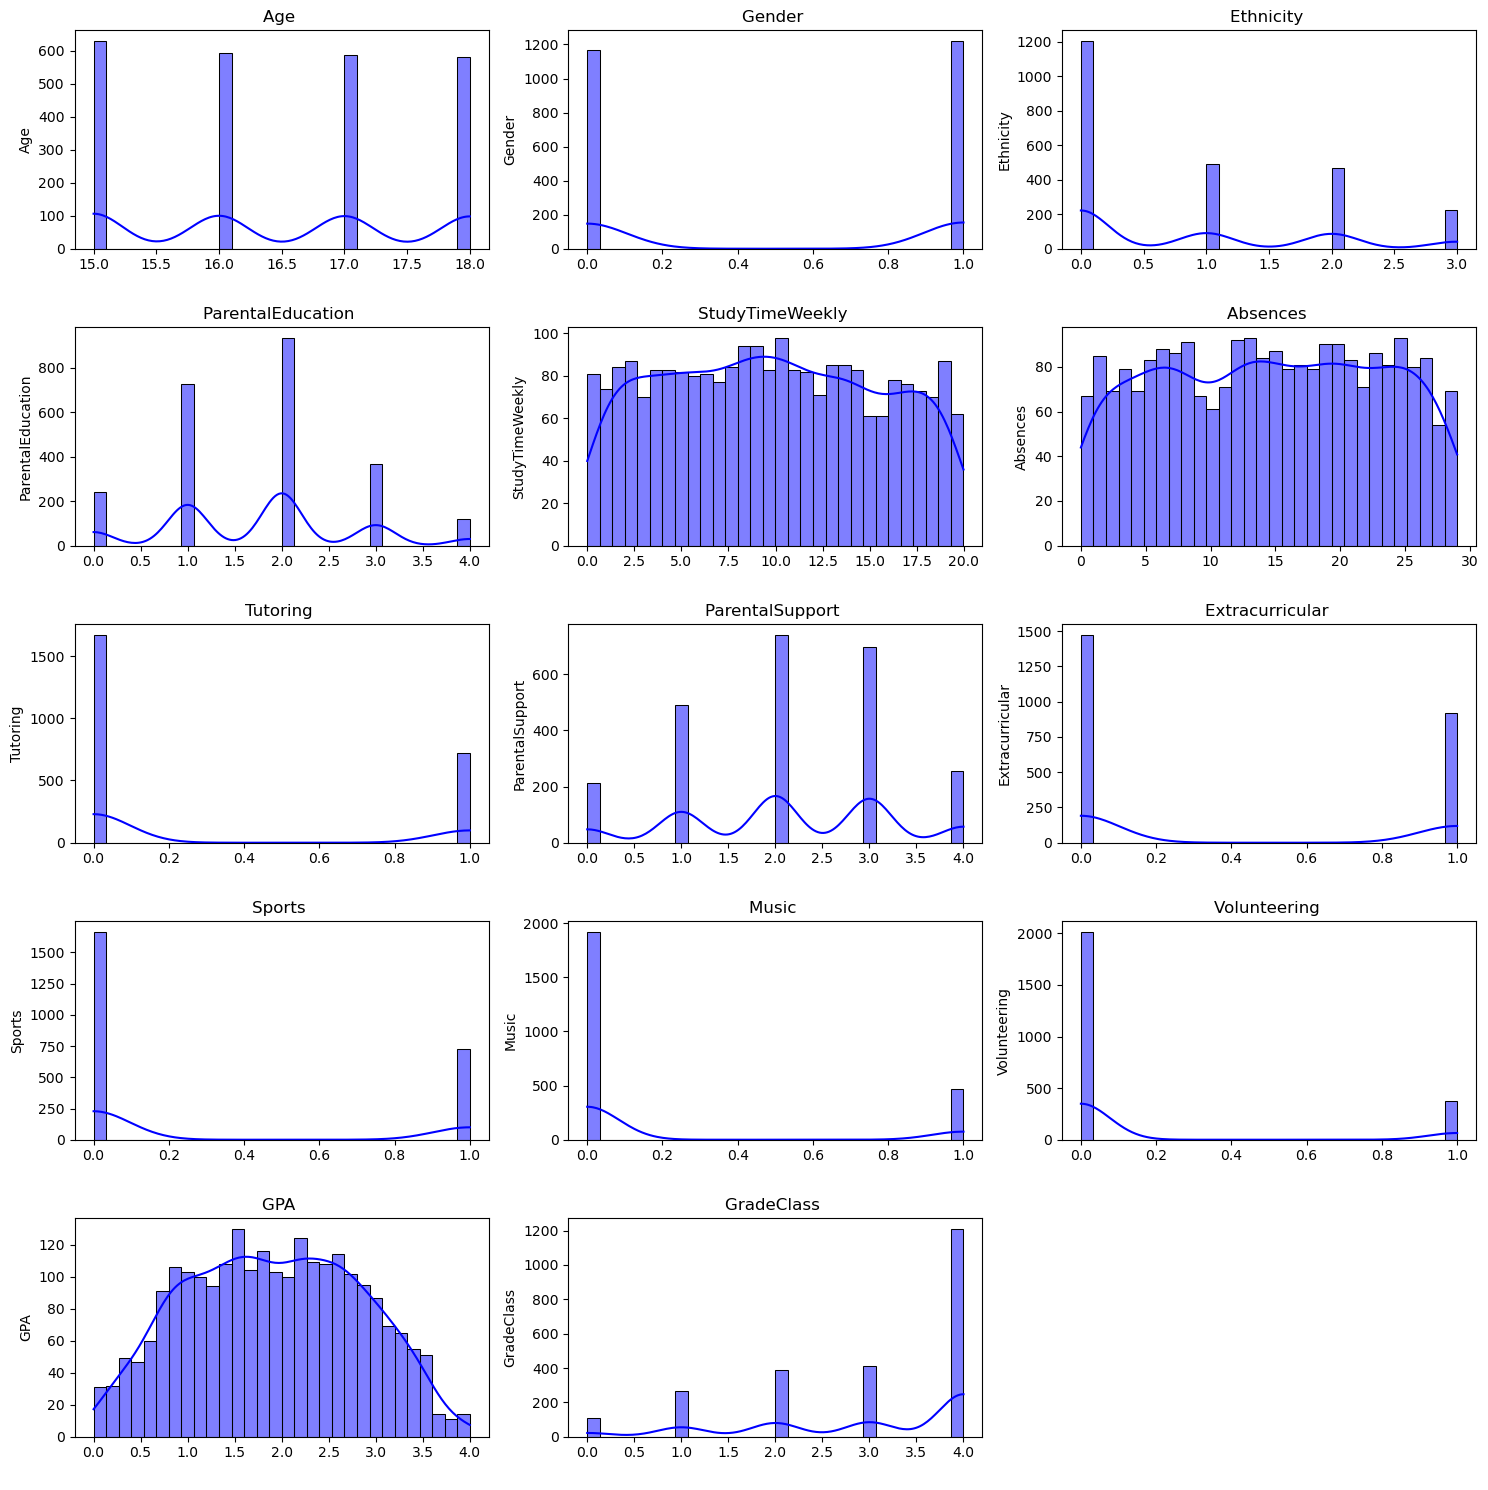

In [18]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

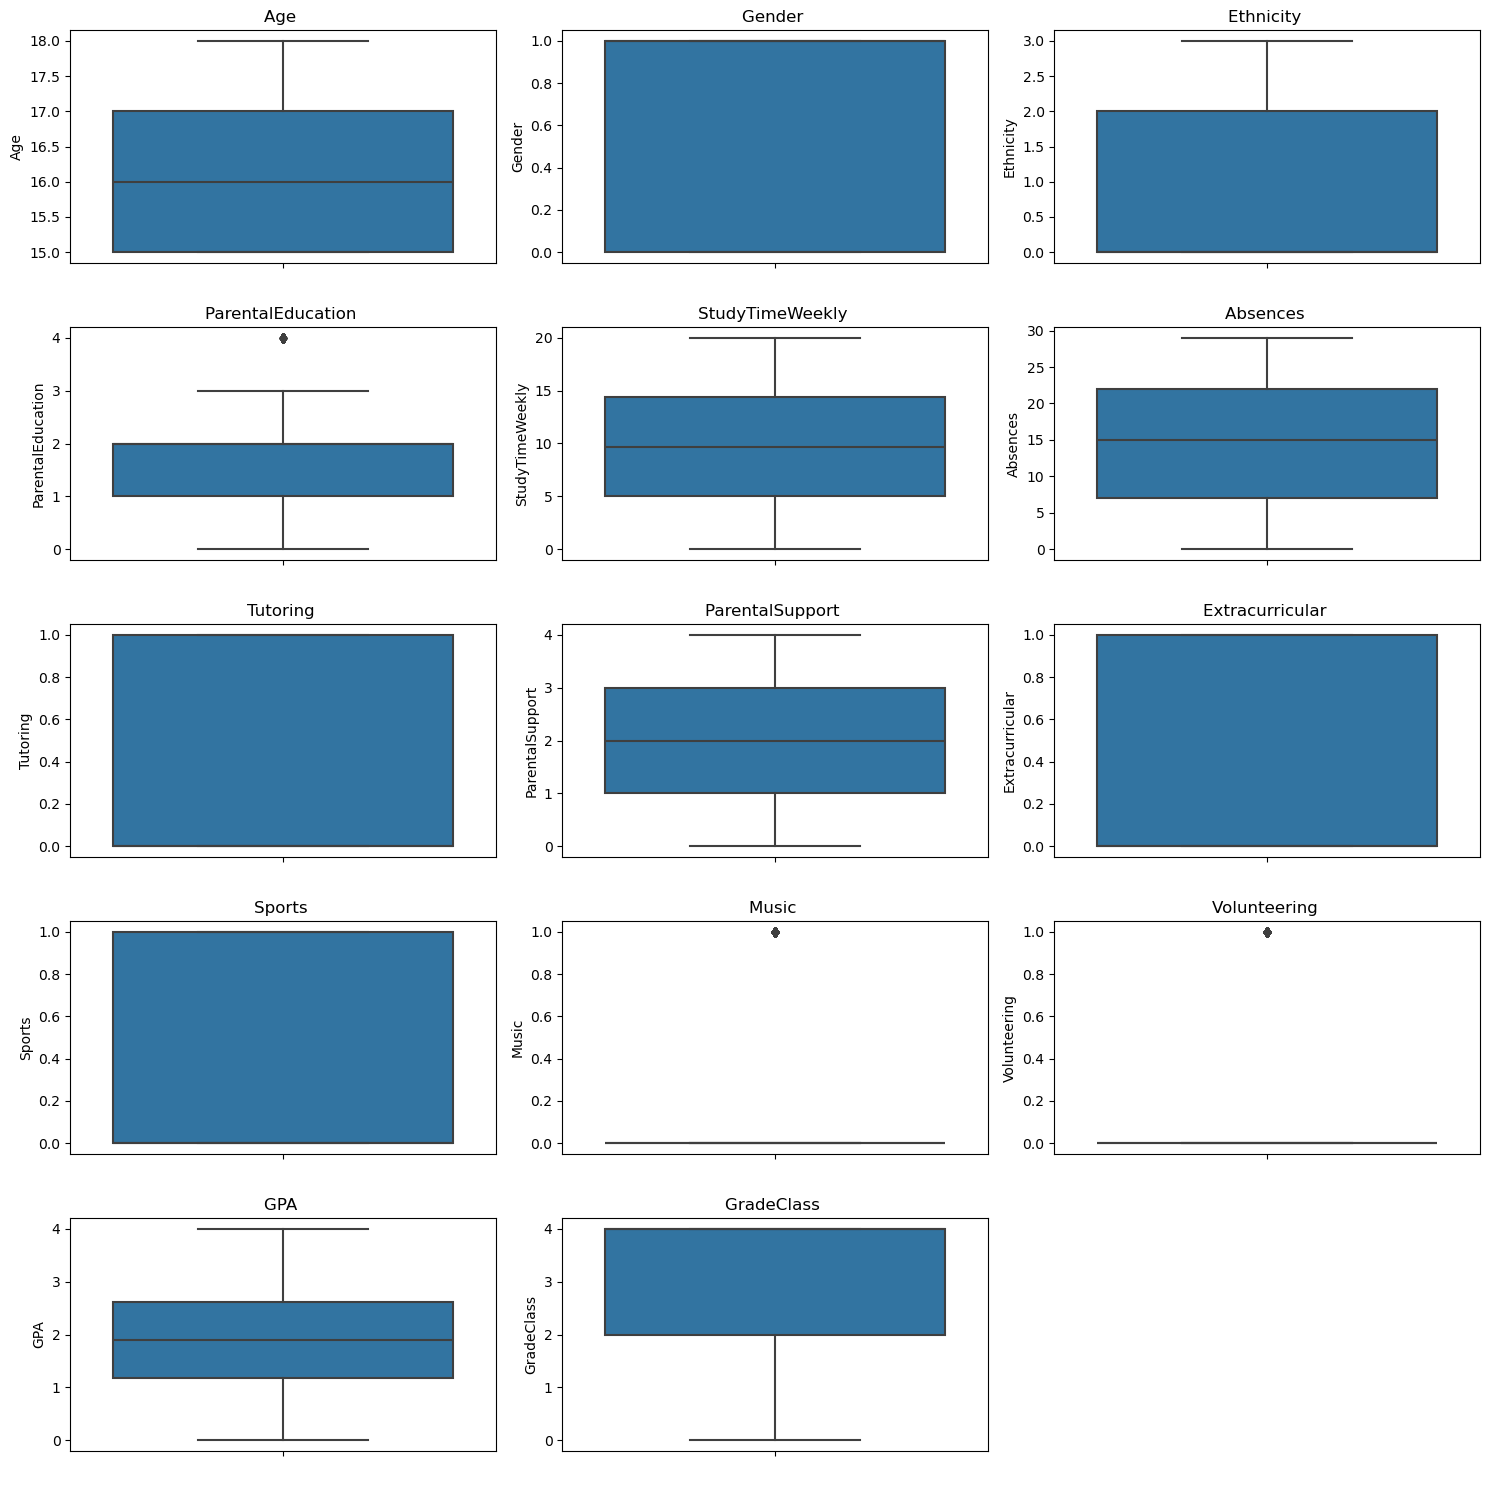

In [19]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

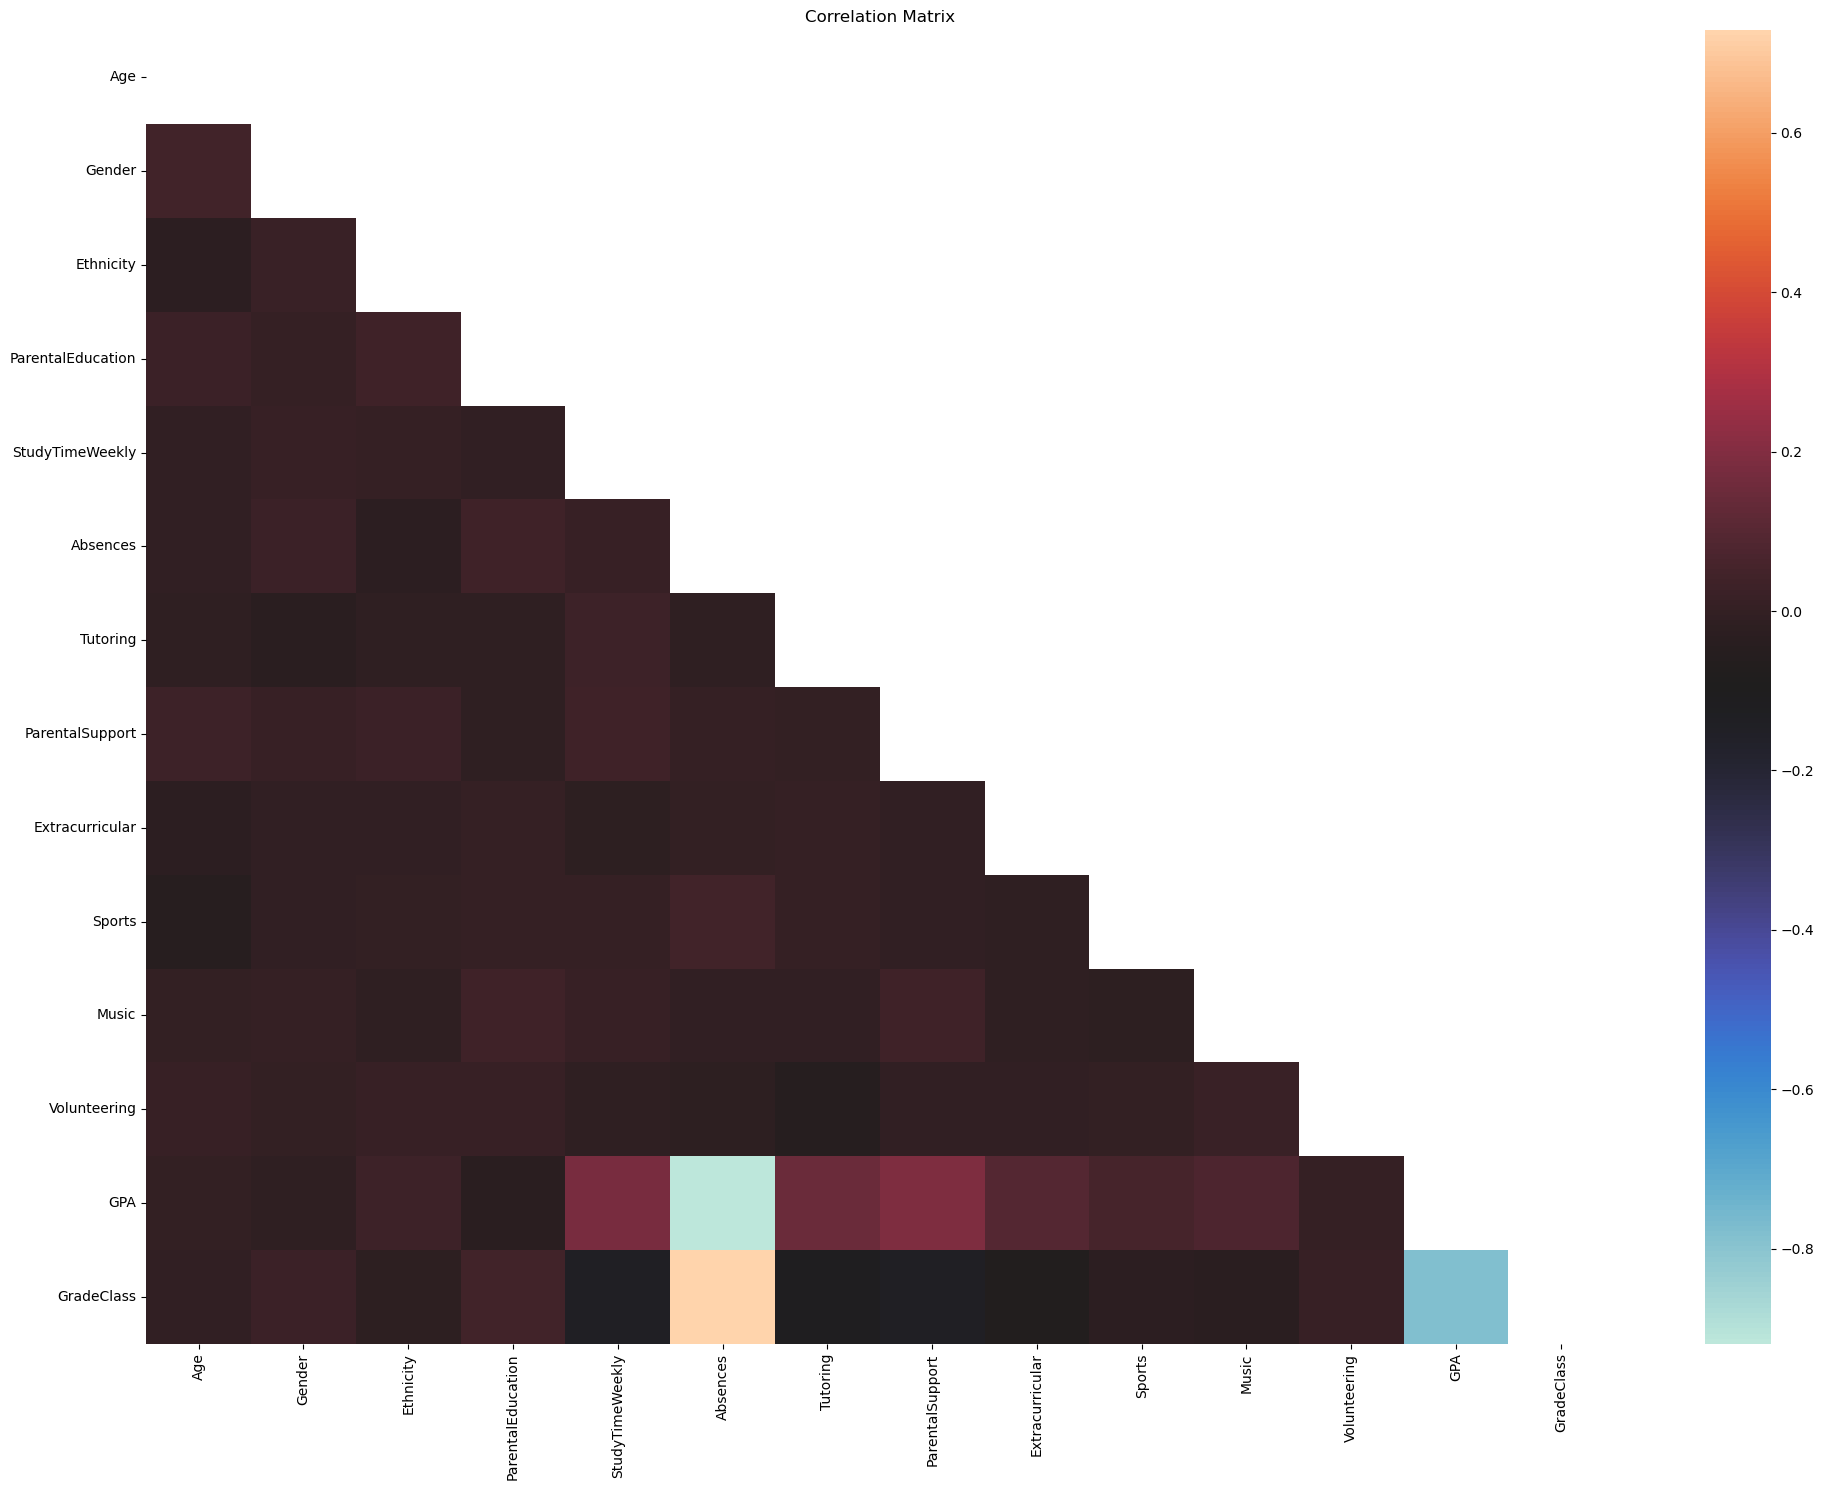

In [25]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [26]:
corr

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Handeling Inbalance Data</h2>
</div>

In [27]:
X = df.drop(['GradeClass'], axis=1)
y = df['GradeClass']

In [28]:
somte = SMOTE(random_state=42)

X, y = somte.fit_resample(X, y)

y.value_counts()

GradeClass
2.0    1211
1.0    1211
4.0    1211
3.0    1211
0.0    1211
Name: count, dtype: int64

In [29]:
X.shape, y.shape

((6055, 13), (6055,))

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Train Test Split</h2>
</div>

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4844, 13), (4844,), (1211, 13), (1211,))

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Model Buliding</h2>
</div>

In [31]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

In [33]:
lxgb_model = LGBMClassifier(random_state=42)
lxgb_model.fit(x_train, y_train)

lxgb_pred = lxgb_model.predict(x_test)

  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 4844, number of used features: 13
[LightGBM] [Info] Start training from score -1.609231
[LightGBM] [Info] Start training from score -1.609231
[LightGBM] [Info] Start training from score -1.609231
[LightGBM] [Info] Start training from score -1.610264
[LightGBM] [Info] Start training from score -1.609231


<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Evaluation</h2>
</div>

In [37]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       242
         1.0       0.97      0.95      0.96       242
         2.0       0.94      0.93      0.93       242
         3.0       0.92      0.91      0.91       243
         4.0       0.88      0.95      0.91       242

    accuracy                           0.93      1211
   macro avg       0.93      0.93      0.93      1211
weighted avg       0.93      0.93      0.93      1211



In [38]:
accuracy_score(y_test, y_pred_xgb)

0.930635838150289

In [39]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       242
         1.0       0.97      0.94      0.95       242
         2.0       0.93      0.94      0.94       242
         3.0       0.92      0.91      0.92       243
         4.0       0.87      0.95      0.91       242

    accuracy                           0.93      1211
   macro avg       0.93      0.93      0.93      1211
weighted avg       0.93      0.93      0.93      1211



In [40]:
accuracy_score(y_test, y_pred_rf)

0.9314616019818331

In [41]:
print(classification_report(y_test, lxgb_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       242
         1.0       0.96      0.94      0.95       242
         2.0       0.94      0.93      0.94       242
         3.0       0.92      0.91      0.92       243
         4.0       0.88      0.95      0.91       242

    accuracy                           0.93      1211
   macro avg       0.93      0.93      0.93      1211
weighted avg       0.93      0.93      0.93      1211



In [42]:
accuracy_score(y_test, lxgb_pred)

0.9289843104872006

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

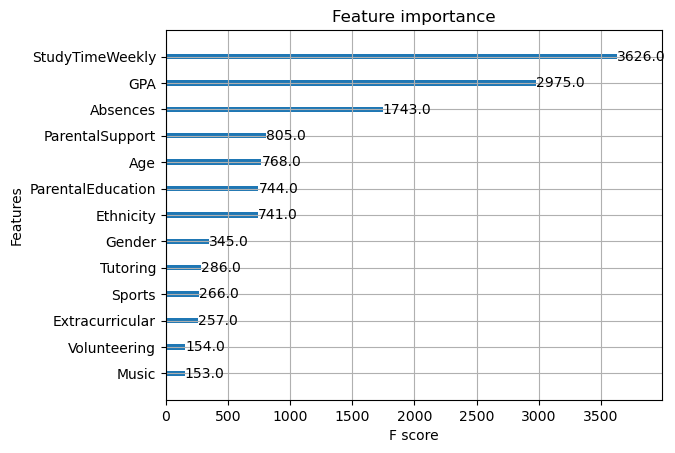

In [43]:
from xgboost import plot_importance

plot_importance(xgb_model)

<div style="background-color: #180161; color: white; padding: 20px; border-radius: 10px;">
    <h2 style="text-align: center">Save the Model</h2>
</div>

In [44]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(rf_model, f)